<div id="container" style="position:relative;">
<div style="float:left"><h1> Mahyar Sabouniaghdam </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k"/>
</div>
</div>

# Big Data Wrangling With Google Books Ngrams

In this assignment, we will apply the skills we've learned in the Big Data Fundamentals unit to load, filter, and visualize a large real-world dataset in a cloud-based distributed computing environment using Hadoop, Spark, Hive, and the S3 filesystem. We will prepare a professional report to summarize the findings and be sure to include an appendix with screenshots of the steps completed for Questions 1 and 2.

The Google Ngrams dataset was created by Google's research team by analyzing all of the content in Google Books - these digitized texts represent approximately 4% of all books ever printed, and span a time period from the 1800s into the 2000s.

The dataset is hosted in a public S3 bucket as part of the Amazon S3 Open Data Registry. For this assignment, we have converted the data to CSV and hosted it on a public S3 bucket which may be accessed here: s3://brainstation-dsft/eng_1M_1gram.csv

For this deliverable, we will produce a report, as well as a jupyter notebook, which will follow a Big Data analysis workflow. As part of this workflow we will filter and reduce data down to a manageable size, and then do some analysis locally on our machine after extracting data from the Cloud and processing it using Big Data tools. The workflow and steps in the process are illustrated below:

1.  Up untill now we spined up a new EMR cluster using the AWS Console and we included Hadoop, Spark, Hive, Jupyterhub, and Livy for our cluster with the release version of EMR 6.1.1.


2.  Then we connected to the head node of the cluster using SSH.


3.  Then we copied the data folder from s3://brainstation-dsft/eng_1M_1gram.csv into a directory on the Hadoop File System (HDFS) named /user/hadoop/eng_1M_1gram.



4.  In this step by using pyspark, we read the data that copied into HDFS in Step 3. We used Jupyterhub on EMR to describe the dataset in pyspark. Then we created a new DataFrame from a query using Spark SQL, filtering to include only the rows where the token is "data" and then we described the new dataset. Finally, we wrote the filtered data back to a directory in the HDFS from Spark using df.write.csv() with the header=True parameter.



5.   In this step we collected the contents of the directory into a single file on the local drive of the head node using getmerge and move this file into a S3 bucket in my account which is mahyar-bstn-bucket.



6. Now we are in step 6:

## Remaining Questions:



6. On your local machine (or on AWS outside of Spark) in python, read the CSV data from the S3 folder into a pandas DataFrame (You will have to research how to read data into pandas from S3 buckets). Note You must have first authenticated on your machine using aws configure on the command line to complete this step).


7. Plot the number of occurrences of the token (the frequency column) of data over the years using matplotlib.


8. Compare Hadoop and Spark as distributed file systems:

  a. What are the advantages/ differences between Hadoop and Spark? List two advantages for each.
 
  b. Explain how the HDFS stores the data.

## 6

- In this step we should first authenticated on our machine using aws configure on the command line.


- Then we will use boto to read the csv data into pandas dataframe:

### Using Boto3 to communicate with S3:

- First we will import packeges we need:

In [1]:
# Import packages

import boto3
import pandas as pd
import matplotlib.pyplot as plt

Let's start with the Client method. We will create a boto3 client object and pass it the AWS service we would like to use, which in this case is S3.

In [2]:
# Instantiate an S3 client
s3_client = boto3.client('s3')

# Check
s3_client

- Recall that this instance is linked to the AWS account authorized on your computer, and if you run this notebook you will see different outputs than what I have here.

In [3]:
# Send a request to list all my buckets, and assign the response to a variable
response = s3_client.list_buckets()

# Check
response

{'ResponseMetadata': {'RequestId': 'MQBECBEXBA36ZK0R',
  'HostId': '0NY45PAlsx/U0lT5C727v7nRIPn60OFryeyfRPjXjD0/wID9q88j6/tsM0VeDEPmvE/A887dvhM=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '0NY45PAlsx/U0lT5C727v7nRIPn60OFryeyfRPjXjD0/wID9q88j6/tsM0VeDEPmvE/A887dvhM=',
   'x-amz-request-id': 'MQBECBEXBA36ZK0R',
   'date': 'Mon, 06 Feb 2023 10:05:25 GMT',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Buckets': [{'Name': 'aws-emr-resources-181777116252-us-east-1',
   'CreationDate': datetime.datetime(2023, 2, 5, 21, 2, 5, tzinfo=tzutc())},
  {'Name': 'aws-logs-181777116252-us-east-1',
   'CreationDate': datetime.datetime(2023, 1, 31, 16, 43, 41, tzinfo=tzutc())},
  {'Name': 'mahyar-bstn-bucket',
   'CreationDate': datetime.datetime(2023, 1, 30, 20, 38, 2, tzinfo=tzutc())}],
 'Owner': {'DisplayName': 'mahyar_sabooni',
  'ID': '7eb122d16e9fa085284e3de4a147f08b6b4a882422396d0227276f95079a5618'}}

- We can access the keys and values of a dictionary using the .keys() and .values() methods, respectively:

In [4]:
# The keys

response.keys()

dict_keys(['ResponseMetadata', 'Buckets', 'Owner'])

In [5]:
# The values

response.values()

dict_values([{'RequestId': 'MQBECBEXBA36ZK0R', 'HostId': '0NY45PAlsx/U0lT5C727v7nRIPn60OFryeyfRPjXjD0/wID9q88j6/tsM0VeDEPmvE/A887dvhM=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': '0NY45PAlsx/U0lT5C727v7nRIPn60OFryeyfRPjXjD0/wID9q88j6/tsM0VeDEPmvE/A887dvhM=', 'x-amz-request-id': 'MQBECBEXBA36ZK0R', 'date': 'Mon, 06 Feb 2023 10:05:25 GMT', 'content-type': 'application/xml', 'transfer-encoding': 'chunked', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, [{'Name': 'aws-emr-resources-181777116252-us-east-1', 'CreationDate': datetime.datetime(2023, 2, 5, 21, 2, 5, tzinfo=tzutc())}, {'Name': 'aws-logs-181777116252-us-east-1', 'CreationDate': datetime.datetime(2023, 1, 31, 16, 43, 41, tzinfo=tzutc())}, {'Name': 'mahyar-bstn-bucket', 'CreationDate': datetime.datetime(2023, 1, 30, 20, 38, 2, tzinfo=tzutc())}], {'DisplayName': 'mahyar_sabooni', 'ID': '7eb122d16e9fa085284e3de4a147f08b6b4a882422396d0227276f95079a5618'}])

- The values aren't easy for us to work with, so let's use the keys instead:

In [6]:
# What's the output if I index the big dictionary by the 'Buckets' key?

response['Buckets']

[{'Name': 'aws-emr-resources-181777116252-us-east-1',
  'CreationDate': datetime.datetime(2023, 2, 5, 21, 2, 5, tzinfo=tzutc())},
 {'Name': 'aws-logs-181777116252-us-east-1',
  'CreationDate': datetime.datetime(2023, 1, 31, 16, 43, 41, tzinfo=tzutc())},
 {'Name': 'mahyar-bstn-bucket',
  'CreationDate': datetime.datetime(2023, 1, 30, 20, 38, 2, tzinfo=tzutc())}]

In [7]:
# Type of the output above

type(response['Buckets'])

list

- Now let's print the names of my buckets:

In [9]:
# Instantiate a resource service client

s3_resource = boto3.resource('s3')

# Iterate over the buckets

for bucket in s3_resource.buckets.all():
    
    # Use the `.name` method on each bucket to print its name
    print(bucket.name)

aws-emr-resources-181777116252-us-east-1
aws-logs-181777116252-us-east-1
mahyar-bstn-bucket


- Accessing and reading in a specific file:

In [10]:
# Get the specified file from the specified bucket and assign it to a variable

s3_object = s3_client.get_object(Bucket='mahyar-bstn-bucket', Key='filtered_data.csv')

# Check

s3_object

{'ResponseMetadata': {'RequestId': 'QQ1Z87ZJA41N3FEX',
  'HostId': 'pFXqElHUzy1FbNP4PW8ufEFAqh3/JF24yOfyG6LiC7YTQ7ke3Z/KY+9PGoRl5aGp1OmTG4LytF8=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'pFXqElHUzy1FbNP4PW8ufEFAqh3/JF24yOfyG6LiC7YTQ7ke3Z/KY+9PGoRl5aGp1OmTG4LytF8=',
   'x-amz-request-id': 'QQ1Z87ZJA41N3FEX',
   'date': 'Mon, 06 Feb 2023 10:11:14 GMT',
   'last-modified': 'Sun, 05 Feb 2023 22:29:01 GMT',
   'etag': '"fb3cf3d45b1fc32b939cbd13697dbe68"',
   'x-amz-server-side-encryption': 'AES256',
   'accept-ranges': 'bytes',
   'content-type': 'text/csv',
   'server': 'AmazonS3',
   'content-length': '7338'},
  'RetryAttempts': 0},
 'AcceptRanges': 'bytes',
 'LastModified': datetime.datetime(2023, 2, 5, 22, 29, 1, tzinfo=tzutc()),
 'ContentLength': 7338,
 'ETag': '"fb3cf3d45b1fc32b939cbd13697dbe68"',
 'ContentType': 'text/csv',
 'ServerSideEncryption': 'AES256',
 'Metadata': {},
 'Body': <botocore.response.StreamingBody at 0x26322550820>}

In [11]:
# Index the above by the 'Body' key

s3_object['Body']

- Now let's read the data:

In [12]:
# Read the csv into a dataframe; note that we pass in the 'StreamingBody' above

s3_filtered_data = pd.read_csv(s3_object['Body'] , header = 1)

# Check

s3_filtered_data

,token,year,frequency,pages,books
0,data,1584,16,14,1
1,data,1614,3,2,1
2,data,1627,1,1,1
3,data,1631,22,18,1
4,data,1637,1,1,1
...,...,...,...,...,...
311,data,2004,201841,93539,3483
312,data,2005,197467,88901,3392
313,data,2006,203669,92960,3449
314,data,2007,168338,78986,3246


- **This is one way to read the data with boto3. we can even read the data directly into Pandas with the code below:**

## Reading data directly into pandas from s3 bucket:

In [13]:
# Read the csv from the specified S3 path into a dataframe

filtered_data_directly_pandas = pd.read_csv('s3://mahyar-bstn-bucket/filtered_data.csv', header = 1 )

# Check

filtered_data_directly_pandas

,token,year,frequency,pages,books
0,data,1584,16,14,1
1,data,1614,3,2,1
2,data,1627,1,1,1
3,data,1631,22,18,1
4,data,1637,1,1,1
...,...,...,...,...,...
311,data,2004,201841,93539,3483
312,data,2005,197467,88901,3392
313,data,2006,203669,92960,3449
314,data,2007,168338,78986,3246


- Now let's check the shape, info and some basic math calculations of the numeric columns:

In [14]:
filtered_data_directly_pandas.describe()

,year,frequency,pages,books
count,316.000000,316.000000,316.000000,316.000000
mean,1847.569620,38555.993671,21711.041139,1493.110759
std,96.874382,69212.366418,34901.797740,1560.040802
min,1584.000000,1.000000,1.000000,1.000000
25%,1771.750000,20.750000,19.000000,11.750000
50%,1850.500000,3004.000000,2729.500000,868.000000
75%,1929.250000,41776.750000,30195.750000,2964.250000
max,2008.000000,254561.000000,122472.000000,4372.000000


In [15]:
filtered_data_directly_pandas.shape

(316, 5)

- Our data has 316 rows and 5 columns.

In [16]:
filtered_data_directly_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      316 non-null    object
 1   year       316 non-null    int64 
 2   frequency  316 non-null    int64 
 3   pages      316 non-null    int64 
 4   books      316 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.5+ KB


- We have 4 nymeric columns and one object column(token). We have no null values.

- **In this question we read the data into a pandas dataframe in 2 ways and then we did some basic describe on the dataset.**

## 7

- Now we will plot the number of occurrences of the token (the frequency column) of data over the years using matplotlib:

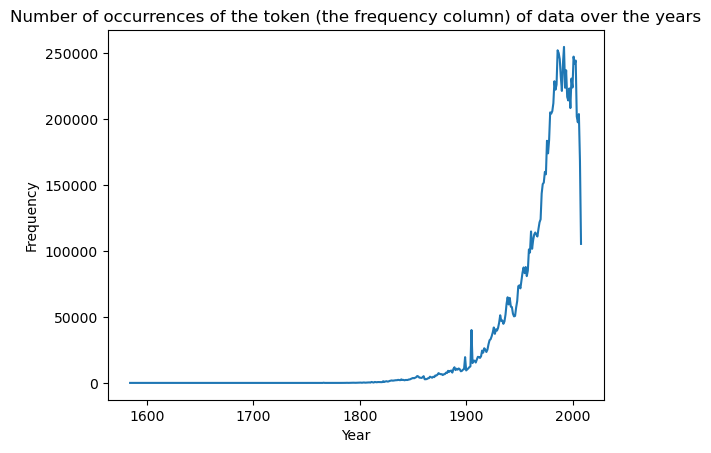

In [18]:
import matplotlib.pyplot as plt

# Group the data by year and calculate the sum of the frequency column

grouped_data = filtered_data_directly_pandas.groupby("year").sum()

# Plot the sum of the frequency column for each year

plt.plot(grouped_data.index, grouped_data["frequency"])

# Add labels to the x and y axes

plt.title("Number of occurrences of the token (the frequency column) of data over the years")
plt.xlabel("Year")
plt.ylabel("Frequency")

# Show the plot

plt.show()


## 8

### 8.a : What are the advantages/ differences between Hadoop and Spark? List two advantages for each.

Hadoop and Spark are both distributed file systems, but they have some differences in terms of their design and functionality:

Advantages of Hadoop:

1. Scalability: Hadoop can scale to handle very large data sets by adding more nodes to the cluster.


2. Cost-effective: Hadoop is an open-source solution, so there are no licensing costs involved, and it can run on commodity hardware.

Advantages of Spark:

1. Speed: Spark is much faster than Hadoop MapReduce for big data processing because it uses in-memory computing and can cache intermediate data in memory for faster access.


2. Ease of use: Spark has a high-level API that makes it easier for developers to write and maintain big data processing code, compared to Hadoop MapReduce, which has a low-level API.


It is worth noting that Hadoop and Spark are complementary technologies, and Spark can be used on top of Hadoop as an alternative to MapReduce for big data processing.

### 8.b : Explain how the HDFS stores the data.

HDFS (Hadoop Distributed File System) is the primary storage system used by Hadoop. HDFS stores data as large files that are broken down into smaller blocks and distributed across multiple nodes in a Hadoop cluster. The blocks are replicated across multiple nodes in the cluster for increased reliability and to provide fault tolerance in case a node fails.

When a file is written to HDFS, it is divided into blocks and each block is stored on multiple nodes. The blocks are stored on the nodes close to the data, reducing network latency and increasing data transfer speeds. The blocks are also replicated to other nodes in the cluster, providing backup copies of the data in case a node fails.

HDFS uses a master/slave architecture, with a NameNode as the master and DataNodes as the slaves. The NameNode maintains the file system namespace, manages the mapping of blocks to DataNodes, and coordinates access to files stored in HDFS. The DataNodes are responsible for storing the actual data blocks and serving read and write requests from clients.

In summary, HDFS is a highly scalable, fault-tolerant, and distributed file system that provides reliable data storage for Hadoop clusters.